# Estimación de $\mu$ para 0l
## Search for supersymmetry with a compressed mass spectrum in the vector boson fusion topology with 1-lepton and 0-lepton final states in proton-proton collisions at $\sqrt{s} = $ 13 TeV

HEPData: https://www.hepdata.net/record/ins1737508

In [1]:
import pyhf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil
import json

In [2]:
#Lectura y almacenamiento de los datas de la figura 3d
dTable = pd.read_csv("./Figure3d.csv", skiprows=[0,1,2,3,4,5])

#Crea data frames para los diferentes canales
ZJets = dTable.iloc[0:12]
SingleTop = dTable.iloc[13:25].rename(columns=dTable.iloc[12]).reset_index().drop(columns = "index").astype('float64')
VV = dTable.iloc[26:38].rename(columns=dTable.iloc[25]).reset_index().drop(columns = "index").astype('float64')
WJets = dTable.iloc[39:51].rename(columns=dTable.iloc[38]).reset_index().drop(columns = "index").astype('float64')
tt = dTable.iloc[52:64].rename(columns=dTable.iloc[51]).reset_index().drop(columns = "index").astype('float64')
QCD = dTable.iloc[65:77].rename(columns=dTable.iloc[64]).reset_index().drop(columns = "index").astype('float64')
S_ldecays = dTable.iloc[78:90].rename(columns=dTable.iloc[77]).reset_index().drop(columns = "index").astype('float64')
S_WZdecays = dTable.iloc[91:103].rename(columns=dTable.iloc[90]).reset_index().drop(columns = "index").astype('float64')
Data = dTable.iloc[104:116].rename(columns=dTable.iloc[103]).reset_index().drop(columns = "index").astype('float64')

#Convierte a arrays de numpy
ZJets = np.asarray(ZJets[ZJets.keys()[1]], dtype='float')
SingleTop = np.asarray(SingleTop[SingleTop.keys()[1]], dtype='float')
VV = np.asarray(VV[VV.keys()[1]], dtype='float')
WJets = np.asarray(WJets[WJets.keys()[1]], dtype='float')
tt = np.asarray(tt[tt.keys()[1]], dtype='float')
QCD = np.asarray(QCD[QCD.keys()[1]], dtype='float')
S_ldecays = np.asarray(S_ldecays[S_ldecays.keys()[1]], dtype='float')
S_WZdecays = np.asarray(S_WZdecays[S_WZdecays.keys()[1]], dtype='float')
Data = np.asarray(Data[Data.keys()[1]], dtype='float')


In [3]:
#Definimos background, signal y data, multiplicado por el tamaño de cada bin para obtener numero de eventos
binSize = np.asarray([100,200,200,200,200,200,200,200,200,300,500,1100])
bkg = (ZJets + SingleTop + VV + WJets + QCD + tt)*binSize
signal = S_ldecays*binSize
Data = Data*binSize

In [23]:
df = pd.DataFrame({"VBF_bkg": bkg, "VBF_errbkg": 0.2*np.ones(12), "VBF_data" : Data, "VBF_ldecays" : signal, "VBF_WZdecays": S_WZdecays*binSize})
df.to_csv("VBFData.csv", index = False)

In [4]:
#Creamos el modelo
model = pyhf.simplemodels.uncorrelated_background(signal = list(signal), bkg = list(bkg), bkg_uncertainty = list(0.2*np.ones(12)))

In [5]:
#Calculamos el mu observado y esperado
observations = np.concatenate((Data, model.config.auxdata))
poi_values = np.linspace(0.1, 2, 50)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations, model, poi_values, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.6f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.6f}")
print(f"Valor esperado (HEPData): μ = {172.04/286.31:.6f}")

Upper limit (obs): μ = 0.585835
Upper limit (exp): μ = 0.681828
Valor esperado (HEPData): μ = 0.600887


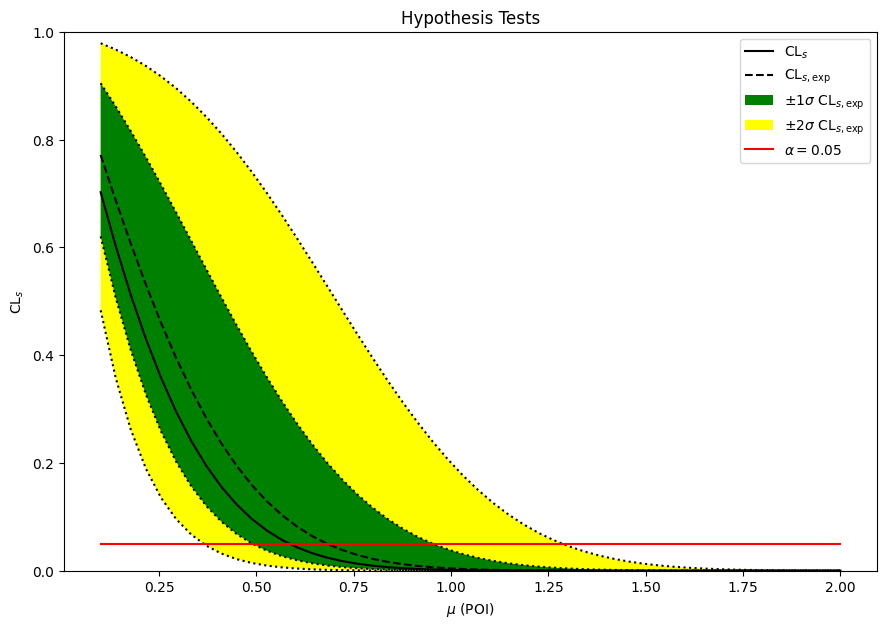

In [6]:
#Grafica de bandera
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
ax.set_title("Hypothesis Tests")

artists = brazil.plot_results(poi_values, results, ax=ax)

## Pruebas

In [7]:
spec = {
    "channels": [
        { "name": "0l",
          "samples": [
            { "name": "signal",
              "data": list(S_ldecays),
              "modifiers": [ { "name": "mu", "type": "normfactor", "data": None} ]
            },
            { "name": "background",
              "data": list(bkg),
              "modifiers": [ {"name": "uncorr_bkguncrt", "type": "shapefactor", "data": None} ]
            }
          ]
        }
    ],
    "observations": [
        { "name": "0l", "data": list(Data) }
    ],
    "measurements": [
        { "name": "Measurement", "config": {"poi": "mu", "parameters": []} }
    ],
    "version": "1.0.0"
}
#workspace = pyhf.Workspace(spec)
#model = workspace.model()

In [8]:
spec = {
    "channels" : [
        {"name" : "multichannel", 
        "samples" : [
            {"name": "SingleTop", "data" : SingleTop, "modifiers": [ {"name": "uncorr_bkguncrt1", "type": "shapefactor", "data": None} ]},
            {"name": "VV", "data" : VV, "modifiers": [ {"name": "uncorr_bkguncrt2", "type": "shapefactor", "data": None} ]},
            # {"name": "WJets", "data" : WJets, "modifiers": [ {"name": "uncorr_bkguncrt3", "type": "shapefactor", "data": None} ]},
            # {"name": "tt", "data" : tt, "modifiers": [ {"name": "uncorr_bkguncrt4", "type": "shapefactor", "data": None} ]},
            # {"name": "QCD", "data" : QCD, "modifiers": [ {"name": "uncorr_bkguncrt5", "type": "shapefactor", "data": None} ]},
            # {"name": "S_ldecays", "data" : np.asarray(S_ldecays[S_ldecays.keys()[1]]), "modifiers": [ {"name": "mu", "type": "normfactor", "data": None} ]},
            {"name": "S_WZdecays", "data" : S_WZdecays, "modifiers": [ {"name": "mu", "type": "normfactor", "data": None} ]}
        ]}
    ],
    "observations" : [
        {"name" : "Data", "data" : Data}
    ],
    "measurements": [
        { "name": "Measurement", "config": {"poi": "mu", "parameters": []} }
    ],
    "version" : "1.0.0"
}
#workspace = pyhf.Workspace(spec)
#model = workspace.model()

In [9]:
spec = {
    "channels" : [
        {"name" : "bkg1", 
        "samples" : [
            {"name": "SingleTop", "data" : list(SingleTop), "modifiers": [ {"name": "uncorr_bkguncrt1", "type": "shapefactor", "data": None} ]}
        ]},
        {"name" : "bkg2", 
        "samples" : [
            {"name": "VV", "data" : list(VV), "modifiers": [ {"name": "uncorr_bkguncrt2", "type": "shapefactor", "data": None} ]}
        ]},
        {"name" : "bkg3", 
        "samples" : [
            {"name": "WJets", "data" : list(WJets), "modifiers": [ {"name": "uncorr_bkguncrt3", "type": "shapefactor", "data": None} ]}
        ]},
        {"name" : "sgnl1", 
        "samples" : [
            {"name": "S_ldecays", "data" : list(S_ldecays), "modifiers": [ {"name": "mu", "type": "normfactor", "data": None} ]}
        ]},
    ],
    "observations" : [
        {"name" : "Data", "data" : list(Data)}
    ],
    "measurements": [
        { "name": "Measurement", "config": {"poi": "mu", "parameters": []} }
    ],
    "version" : "1.0.0"
}
#workspace = pyhf.Workspace(spec)
#model = workspace.model()

In [10]:
spec = {
    "channels": [
        { "name": "0l",
          "samples": [
            { "name": "signal",
              "data": list(S_ldecays),
              "modifiers": [ { "name": "mu", "type": "normfactor", "data": None} ]
            },
            { "name": "background",
              "data": list(WJets),
              "modifiers": [ {"name": "uncorr_bkguncrt", "type": "shapesys", "data": list(0.1* WJets)} ]
            }
          ]
        }
    ],
    "observations": [
        { "name": "0l", "data": list(Data) }
    ],
    "measurements": [
        { "name": "Measurement", "config": {"poi": "mu", "parameters": []} }
    ],
    "version": "1.0.0"
}
#workspace = pyhf.Workspace(spec)
#model = workspace.model()